In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import navbench as nb
from navbench import imgproc as ip

db = nb.Database('../datasets/bottom_of_campus/straight_route2_fwd')

15:05:53.852 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@238] Using image database at ../datasets/bottom_of_campus/straight_route2_fwd
15:05:53.852 [BoBRobotics::Navigation::ImageDatabase::loadMetadata@867] WARN: No database_metadata.yaml file found
15:05:53.852 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@273] WARN: Could not find CSV file


/home/alex/.local/lib/python3.10/site-packages/bob_navigation-1.0+20220425.4963cd2f.dirty-py3.10-linux-x86_64.egg/bob_robotics/navigation/__init__.py:75: UserWarning: Not known whether or not database is unwrapped
  warn("Not known whether or not database is unwrapped")


Testing frames 200 to 1200 (n=1001)
1 zero values (perfect matches?) are not being shown
1 zero values (perfect matches?) are not being shown


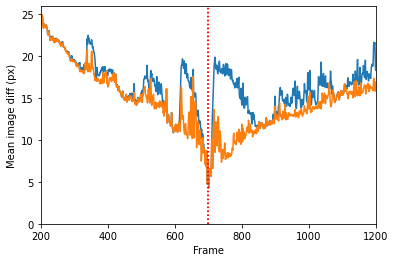

In [2]:
FRAME_DIST  = 500
IMSIZE      = (180, 55)
FR_STEP     = 1
FRAME       = 700
RIDF_STEP   = 2

# IDF vs RIDF for every frame
resize = ip.resize(*IMSIZE)
db.plot_idfs_frames(FRAME, FRAME_DIST, resize, FR_STEP, RIDF_STEP)

In [3]:
F;RAME_DIST  = 500
IMSIZE      = (180, 55)
FR_STEP     = 10 # Every 10th frame
FRAME       = 700
RIDF_STEP   = 2

resize = ip.resize(*IMSIZE)
tests = (resize, (resize, ip.histeq), (resize, ip.remove_sky))
labels = ['None', 'Histeq', 'No sky']

diffs = []
for test in tests:
    (images, snap, entries) = db.load_test_frames(FRAME, FRAME_DIST, test, FR_STEP)
    diffs.append(nb.route_ridf(images, snap, step=RIDF_STEP))

# Plot for different image preprocessing methods
nb.plot_route_idf(entries, *diffs, labels=labels);

NameError: name 'F' is not defined

Testing for (720, 220)
Testing frames 200 to 1200 (n=101)
Testing for (180, 55)
Testing frames 200 to 1200 (n=101)
Testing for (45, 13)
Testing frames 200 to 1200 (n=101)
Testing for (22, 6)
Testing frames 200 to 1200 (n=101)
1 zero values (perfect matches?) are not being shown
1 zero values (perfect matches?) are not being shown
1 zero values (perfect matches?) are not being shown
1 zero values (perfect matches?) are not being shown


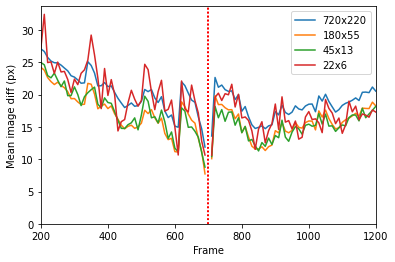

In [ ]:
FRAME_DIST  = 500
FR_STEP     = 10
FRAME       = 700
RIDF_STEP   = 2

sizes = [(720, 220), (180, 55), (45, 13), (22, 6)]

diffs = []
for size in sizes:
    print("Testing for", size)
    resize = ip.resize(*size)
    (images, snap, entries) = db.load_test_frames(FRAME, FRAME_DIST, resize, FR_STEP)
    diffs.append(nb.route_idf(images, snap))

labels = ["%ix%i" % size for size in sizes]

# Plot comparing image difference for images of different sizes
nb.plot_route_idf(entries, *diffs, labels=labels)
plt.show()